# Assignment 2: Statistics
## [Scientific Computing with Python]

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.warnings.simplefilter('ignore', FutureWarning)
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context('notebook')
sns.set_palette('muted')

# General instructions

1. When instructed to implement a function, use the given function names and parameters lists; failure to do so may cause test functions to fail during grading.
1. When instructed to generate a plot, make sure that the plot is clear, that axes are propely labeled, and that the notebook is saved with the plot inline, so that the grader can see the plot without running the code. Make sure that you re-generate the plot if you changed the code!
1. Code lines with a triple comment `###` should not be removed or modified, they are used for automatic grading.
1. Note that there are 3 exercises and the last cell in the notebook says **end of assignment**; if you are missing anything please download the origianl file from the course website.
1. This exercise doesn't put much emphasis on efficieny or runtime. *But*, your code should still run within a reasonable time (a few minutes) and you should use idioms learned in class, e.g. array opreations, wherever possible to "lose your loops".
1. Questions regarding the exercises should be posted to the course forum at the designated group (i.e. "assignment2"). You can post questions anonymously. You can also visit the Office Hours, but please do not email the course staff with questions about the exercise.
1. Please submit just this file without changing its name or adding any identifying information such as name or ID number.

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd
import seaborn as sns
import urllib.request
import zipfile
import os.path

# Exercise 1

In this question we will look for a relation between litter or clutch size (number of offspring per birth) and the birth weight (the weight of the offpring) in the animal kingdom.

For this analysis we will load the [AnAge](http://genomics.senescence.info/download.html#anage) dataset that we used in [lecture 4](../notebooks/pandas-seaborn.ipynb).

Get the zip file containing the data, extract it and read the data to a `DataFrame`. We are interested in the `Litter/Clutch size` and `Birth weight (g)` columns.

In [96]:
url = 'http://genomics.senescence.info/species/dataset.zip'
fname = '../data/anage_dataset.zip'
if not os.path.exists(fname):
    urllib.request.urlretrieve(url, fname)
print("Data file exists:", os.path.exists(fname))

Data file exists: True


In [97]:
with zipfile.ZipFile(fname) as z:
    f = z.open('anage_data.txt')
    data = pd.read_table(f)


If you examined the data you might have noticed that some rows have a `NaN` value in our columns of interest. 
We need to remove these rows from the data.
You can use `np.isnan`, `np.isfinite` or any other method you'd like.

In [98]:
data = data.dropna(subset=['Litter/Clutch size', 'Birth weight (g)'])

assert not np.isnan(data['Litter/Clutch size']).any() ###
assert not np.isnan(data['Birth weight (g)']).any() ###

We are looking for a possible linear relationship between the variables.

Plot a scatter plot of the data, and consider if you should transform the data using a transformation such as log, square-root, reciprocal ($1/x$) or some other monotone transformation that makes sense to you. 
Both columns might require transformations.

Plot a new scatter plot of the transformed data.

Don't forget the axes labels should change to reflect the transformation! 
But in the plot I left below I didn't put the name of the transformation I chose so that it is a _secret_...

Text(0.5,0,'log of Litter/Clutch size')

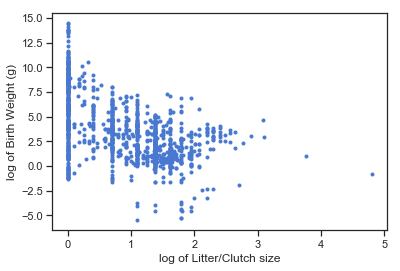

In [99]:
plt.plot([np.log(x) for x in data['Litter/Clutch size']], [np.log(y) for y in data['Birth weight (g)']], '.')
plt.ylabel('log of Birth Weight (g)')
plt.xlabel('log of Litter/Clutch size')

After applying a transformation for which there is a good correlation between the litter size and the birth weight, create a linear model plot using Seaborn.

Text(0.5,6.8,'log of Litter/Clutch size')

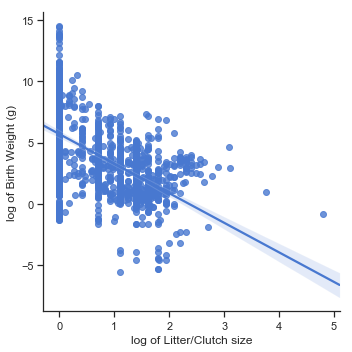

In [100]:
new_data = data[['Litter/Clutch size','Birth weight (g)']]
sns.lmplot( 
    y='Birth weight (g)', 
    x='Litter/Clutch size',
    data=np.log(new_data), 
);
plt.ylabel('log of Birth Weight (g)')
plt.xlabel('log of Litter/Clutch size')


Now we should be satisfied that there is a linear relationship between the variables.

Please perform linear regression on the transformed data using `scipy.stats.linregress`.
Print the intercept and slope of the regression.

Note that if you used a different transformation you might get different values; that's OK as long as your results make sense.

In [101]:
slope,intercept, rvalue, pvalue, strerr = scipy.stats.linregress(np.log(new_data['Litter/Clutch size']),np.log(new_data['Birth weight (g)']))
print("intercept: {:.3f}, slope: {:.3f}".format(intercept, slope)) ###

intercept: 5.693, slope: -2.410


Note that `linregress` provides a p-value for the null hypothesis that the slope is 0.

Think: What does it mean if the null hypothesis is rejected? 

Decide if the null hypothesis can be rejected and print a statement that summarizes the result regarding litter size and birth weight.

Don't forget to print the p-value to support your claim.

In [102]:
str = "p-value={:.2}"
print(str.format(pvalue))
print("Litter size has significant and negative effect on birth weight")




p-value=9e-97
Litter size has significant and negative effect on birth weight


Finally, use the slope and intercept to predict the birth weight of offspring in a litter with 10 offspring (don't forget the transformation!).

In [103]:
birth_weight = slope*np.log(10) + intercept
str = "In a litter with 10 offspring, the birth weight will be {} grams"
print(str.format(np.power(np.e,birth_weight)))

In a litter with 10 offspring, the birth weight will be 1.1552525754218654 grams


# Exercise 2

In this analysis we will compare the body temperature of animals to check if indeed there is such a thing as [warm-blooded](http://en.wikipedia.org/wiki/Warm-blooded) and cold-blooded animals.

You'll need to reload the data since in the previous exercise you removed some of the rows.

In [104]:
with zipfile.ZipFile(fname) as z:
    f = z.open('anage_data.txt')
    data = pd.read_table(f)

The temperatures are in Kelvin degrees in the `Temperature (K)` column, and we like Celsius degrees, so use transform the temperature to Celsius and save the result in a new column.

Note: SciPy has a special function for Kelvin to Celsius conversion.

In [105]:
from scipy.constants import convert_temperature
data['Temperature (C)'] = scipy.constants.convert_temperature(data['Temperature (K)'], 'Kelvin','Celsius')

Plot a histogram of the temperatures (in Celsius). Don't forget to use meaningful `bins`.

Text(0.5,0,'Celsius')

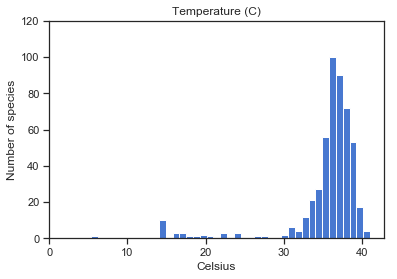

In [106]:
data.hist(column='Temperature (C)',grid = False, bins = int(np.max(data['Temperature (C)'])))
binsx = range(0,50,10)
plt.xticks(binsx)
binsy = range(0,140,20)
plt.yticks(binsy)
plt.ylabel("Number of species")
plt.xlabel("Celsius")

Count how many species we have in the data frame for each animal Class.
Remove from the data classes with fewer than 10 species (you can do this manually by specifiyng the class names or automatically using the count you calculated).

Don't forget to clean the data frame from rows with missing data in the temperature column.

In [107]:
data = data.dropna(subset=['Temperature (C)'])
count_animal_values = data['Class'].value_counts()
after_remove = count_animal_values[count_animal_values>=10]
names_of_species_with_more_than_10 = after_remove.index
data = data[data['Class'].isin(names_of_species_with_more_than_10)]

Plot a separate histogram of the temperature for each animal Class.

Use a [faceted figure](https://seaborn.pydata.org/examples/faceted_histogram.html).
Don't forget axes labels, proper bins, and a reasonable figure size.

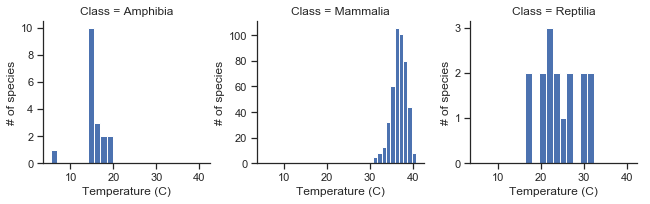

In [108]:
g = sns.FacetGrid(data, col="Class", margin_titles=True,sharey = False)
bins = np.linspace(0, np.max(data['Temperature (C)']), 35)
g.map(plt.hist, "Temperature (C)", color="steelblue", bins=bins)
g.set(ylabel='# of species')
sns.set(style="darkgrid")





Perform a [t-test](http://iaingallagher.tumblr.com/post/50980987285/t-tests-in-python) to verify that the temperature of mammals is, on average, larger then the temperature of amphibians.
Print the result of the t-test.

In [109]:
mammals_df = data[data['Class'] == "Mammalia"]
mammals_temperature_arr = mammals_df["Temperature (C)"]
amphibians_df = data[data['Class'] == "Amphibia"]
amphibians_temperature_arr= amphibians_df["Temperature (C)"]
_, p_value = scipy.stats.ttest_ind(np.array(amphibians_temperature_arr), np.array(mammals_temperature_arr),equal_var=False)
H0_rejected = p_value < 0.01
print("The temperatures of mammals and amphibians are different? {}".format(H0_rejected)) ###
print("P-value: {:.2g}".format(p_value)) ###

The temperatures of mammals and amphibians are different? True
P-value: 1.9e-16


# Exercise 3

We are going to analyze an example given in Chapter 1 of the book [Probabilistic Programming & Bayesian Methods for Hackers
](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/), where it is solved using a Bayesian method.
We'll use a more standard frequentist method, the method of **maximum likelihood**.

The following dataset contains the number of text-messages recieved by a single user during a period of 74 days.

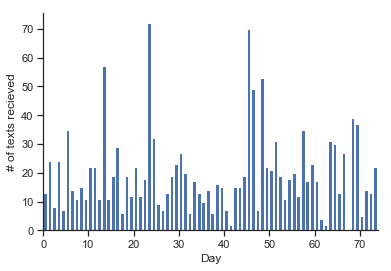

In [110]:
fname = '../data/txtdata.csv'
data = np.loadtxt(fname).astype(int)
days = len(data)
plt.bar(range(days), data, align='edge')
plt.xlabel('Day')
plt.ylabel('# of texts recieved')
plt.xlim(0, days)
sns.despine()

Presumably, the number of message recived per day follows a Poisson distribution.

Here, we plot the histogram of number of text per day and the best-fit Poisson distribution and print the average number of texts.

Note: `scipy.stats.poisson` doesn't have a `fit` method, but a Poisson distribution can be fitted to data by estimating the distribution parameter, which is the expected value, from the data mean.

Average number of texts received 19.74


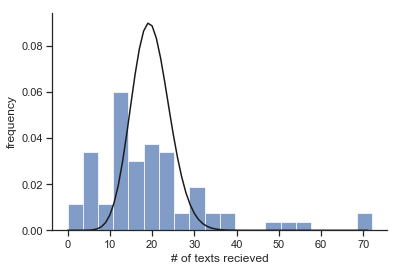

In [111]:
from scipy.stats import poisson
def hist_poisson(data):
    λ = data.mean()
    poi = poisson(λ)
    hist, bins, _ = plt.hist(data, bins=20, density=True, alpha=0.7)
    xrange = range(0, data.max())
    plt.plot(xrange, poi.pmf(xrange), '-k')
    plt.xlabel('# of texts recieved')
    plt.ylabel('frequency')
    sns.despine()
    print("Average number of texts received {:.2f}".format(λ))
    
hist_poisson(data)

This doesn't look so good, right? 
There are ways to quantify how good this looks (KL-divergence for example), but let's just plot what it would look like if we draw the same amount of draws from a Poisson distribution with the same parameter (i.e. same expected value); would the plot would look "nicer"?

Average number of texts received 19.51


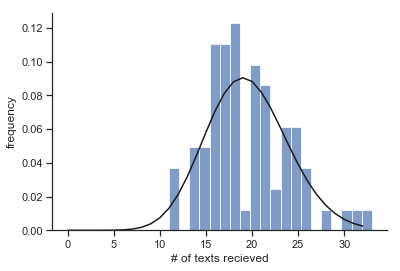

In [112]:
hist_poisson(np.random.poisson(data.mean(), size=days))

To explain why the Poisson doesn't fit the data, we might suspect that the parameter of the distribution is not the same for all days.
Specifically, we will assume that at some day $\tau$ the parameter changed from one value $\lambda_1$ to a different value $\lambda_2$, or more formally,

$$
\lambda = \cases{\lambda_1, t<\tau \\ \lambda_2, t \ge \tau}
$$

To find the switch point $\tau$, we will do the following algorithm:

- For each day $t$ in the span of days;
 - Estimate $\lambda_1$ and $\lambda_2$ from the mean of the days before and after the switch day $t$;
 - Define two Poisson random variables with the parameters $\lambda_1$ and $\lambda_2$;
 - Calculate the probability to get the observed data from the two Poisson random variables;
- Set $\tau$ to the day $t$ with the largest probability.

The probability to get the data $X$ given parameter value $\theta$ is called the **likelihood** of $\theta$ given data $X$.
Therefore, the method we described above is the method of **maximum likelihood**.

Because we are dealing with very small numbers, it is easier to work with log-likelihood or log-probabilities.

Therefore, here is the above algorithm again, written with mathematical formulas, with $T$ as number of days and $x_k$ as number of texts recieved in day $k$,

- $\lambda_1 = \frac{1}{t} \sum_{k=1}^{t}{x_k}$, $\lambda_2 = \frac{1}{T-t} \sum_{k=t+1}^{T}{x_k}$
- $P_j \sim Poisson(\lambda_j)$;
- $f_j(x)$ is the probability mass function of $P_j$;
- $LogLik\big(t \mid x\big) = \sum_{k=1}^{t}{\log\big({f_1(x_k)}\big)} + \sum_{k=t+1}^{days}{\log\big({f_2(x_k)}\big)}$
- $\tau = argmax_{t \in \{1, \ldots, T\}} LogLik\big(t \mid x\big)$

Note: the log of the probability to draw $k$ from a Poisson can be calculated using `Poisson.logpmf(k)`.

Think: why are we calculating a sum?

Calculate the log-likelihood for each potential switch point $t$, plot the log-likelihoods, and print the most likely switch point.

In [113]:
lambda1,lambda2,poisson1,poisson2,max_likelyhood_tplus, max_likelyhood_tminus = 0,0,0,0,0,0
def max_likelyhood_for_day_t(t):
    lambda1, lambda2 = data[:t].mean(), data[t:].mean()
    poisson1,poisson2 = poisson(lambda1),poisson(lambda2)
    max_likelyhood_tminus, max_likelyhood_tplus = poisson1.logpmf(data[:t]).sum(), poisson2.logpmf(data[t:]).sum()
    return max_likelyhood_tminus + max_likelyhood_tplus
days = [np.add(i,1) for i in range(74)]
days_likelyhood_arr = np.vectorize(max_likelyhood_for_day_t)(days)
print(days_likelyhood_arr)

[-490.47682562 -491.72145553 -489.86615261 -491.10968662 -488.77425167
 -491.5429744  -491.08620801 -490.0192151  -489.41496427 -487.9225825
 -488.69121735 -489.30486371 -487.92175401 -491.79067623 -491.53790001
 -491.51537728 -491.79015927 -491.29954405 -491.27251059 -490.7160395
 -490.9332042  -490.27328604 -490.13556236 -491.17329796 -490.21216994
 -491.10248318 -491.68605823 -491.79664407 -491.80061215 -491.77224172
 -491.60288568 -491.59582954 -491.80038339 -491.77847774 -491.63698277
 -491.21300844 -490.84207489 -489.58607309 -489.15140271 -488.54086734
 -486.59506705 -483.12238822 -481.99575647 -480.77909364 -480.49292519
 -489.58828997 -491.65830141 -491.03651204 -491.63172406 -491.54499452
 -491.48438394 -490.73849691 -490.77132853 -491.36308936 -491.44297772
 -491.41564842 -491.71807057 -490.81894128 -491.0142227  -490.65937675
 -490.87084133 -491.76475517 -491.29555897 -491.78437986 -491.61180281
 -491.80043211 -491.52984305 -491.20913385 -491.47205056 -487.1329273
 -490.827

C:\Users\dor\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dor\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\dor\Anaconda3\lib\site-packages\scipy\stats\_discrete_distns.py:493: RuntimeWarning: invalid value encountered in greater_equal
  return mu >= 0


In [114]:
max_likelyhood_val = np.max(days_likelyhood_arr)
τ = np.argwhere(days_likelyhood_arr == max_likelyhood_val)[0][0] + 1
print('Most likely switch day:', τ) ###

Most likely switch day: 45


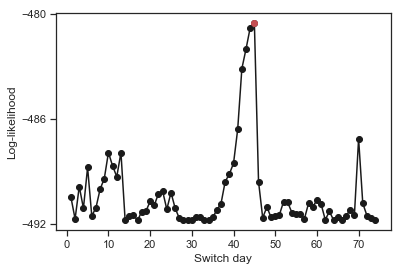

In [115]:
plt.xlabel('Switch day')
plt.ylabel('Log-likelihood')
plt.plot(days,days_likelyhood_arr, 'k')
plt.plot(days,days_likelyhood_arr, 'ko')
binsx = range(-480,-493,-6)
plt.yticks(binsx)
plt.plot(τ , days_likelyhood_arr[τ-1] , 'o', color='r')